# Otimização Natural - 1º Lista de exercícios
Aluno: Fernando Dias

Para essa lista de exercícios, foram utilizadas as seguintes bibliotecas:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## 1 - Método de Monte Carlo

Para calcular o resultado numérico da integral $\int_Q f(x) dx$ com o método de Monte Carlo, calcula-se a média dos valores de $f(x)$ com $x$ sendo sorteado uniformemente de $Q$. 

### Item 1-a

Utilizando os três números dados na questão, o método de monte-carlo resulta em:

In [3]:
# Usa os três valores dados da questão
a = np.array([0.9501,0.2311,0.6068])
# Aplica a função x^3 em cada resultado
a = a**3
# Tira o valor médio
np.mean(a)

0.3644719103879999

### Item 1-b

Dada que a distribuição utilizada é exponencial, o resultado da integração é equivalente a $\frac{1}{N}\sum x_i^2$ dos valores utilizados. Porém, como os limites de integração são $[0,1]$, os valores maiores que 1 devem ser descartados. Isso resulta no seguinte valor:

In [4]:
a = np.array([0.0512,0.4995,0.7216])
np.mean(a**3)

0.16683381543300002

## Questão 2 - Algoritmo de metrópolis

Temos $X\in{1,2,3,4,5}$, $J(x)=(x-3)^2$ e $T=1$.

### Item 2-a

Os fatores de Boltzmann para cada valor de $x$ é:

In [21]:
T = 1
x = np.array([1,2,3,4,5]) # Valores de X
J = lambda x: (x-3)**2 # Função custo
termos = np.exp(-J(x)/T) # Resultado
termos

array([0.01831564, 0.36787944, 1.        , 0.36787944, 0.01831564])

### Item 2-b

O algoritmo proposto serve para gerar números aleatórios que seguem qualquer distribuição discreta. Nesse caso, a distribuição de Boltzmann-Gibbs é formada com os termos $\exp(-J(x)/T)$ que já foram calculados no item anterior. 

Para criar o gerador dessa distribuição, pode-se utilizar o seguinte algoritmo:

In [37]:
# Calcula-se os pesos de cada estado em termos de densidade
densidade = termos/np.sum(termos)
# Calcula-se a densidade cumulativa (cdf) da distribuição
densidadeCumulativa = np.cumsum(densidade)
# Sorteia-se um número de uma distribuição uniforme entre 0 e 1
amostraUniforme = np.random.uniform(0,1)
# Compara-se esse valor com o valor da CDF
np.argmax(amostraUniforme < densidadeCumulativa)+1

2

Ao se fazer a amostra de um número grande de números, os números resultantes seguem a distribuição desejada. 

Para demonstrar a funcionalidade, é feito esse método para $N=10^4$ números e é comparado o gráfico gerado pelos números aleatórios com o gráfico de densidade calculado analiticamente na questão anterior:

<StemContainer object of 3 artists>

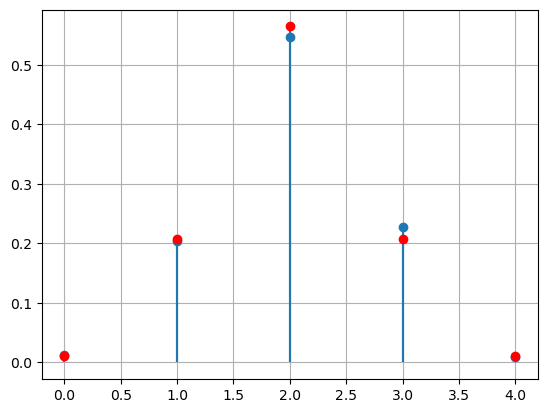

In [71]:
# Método de geração de valores aleatórios
# (Mesmo que a célula anterior, só que vetorialmente)
N = 1000
valoresUniformes = np.random.uniform(0,1,size=(N,1))
distribuicaoFormada = np.argmax(valoresUniformes < densidadeCumulativa[np.newaxis,:],axis=1)+1
# Conta quantos números cairam em cada estado
valores,dist = np.unique(distribuicaoFormada,return_counts=True) 
dist = dist/np.sum(dist) # Normaliza a distribuição (calcula a densidade)
# Gera o gráfico e insere a distribuição
plt.grid(True)
plt.stem(dist,basefmt=" ")
# Insere o resultado analítico em vermelho
plt.stem(densidade,basefmt=" ",markerfmt='r')

### Questão 3

Para gerar números cuja distribuição de energia siga a constante de boltzmann, pode-se simplesmente usar o algoritmo de metropolis. Os números são obtidos a

In [82]:
%%time

# Definição das variáveis "globais"
Custo = lambda x: x**2
epsilon = 0.1
T = 0.1
N = 10**3

# Algoritmo de metrópolis
def GeradorNumerosBoltzmann(x,Custo,epsilon,T,N):
    j = Custo(x)
    for n in range(N):
        xhat = x + epsilon*np.random.uniform(-0.5,.5,size=x.shape)
        jhat = Custo(xhat)
        if jhat - j < 0:
            x = xhat
            j = jhat
        else:
            p = np.exp(-jhat/T)
            q = np.random.uniform(0,1)
            x = xhat if q < p else x
            j = jhat if q < p else j
    return x[0]

M = 10**3 # quantidade de números a se tirar
res = np.zeros(M)

# Gera M números aleatórios que seguem a distribuição de Boltzmann
for i in range(M):
    x = np.random.uniform(-5,5,size=(1,)) # Estado inicial aleatório
    res[i] = GeradorNumerosBoltzmann(x,Custo,epsilon,T,N)

CPU times: user 7.27 s, sys: 92.4 ms, total: 7.36 s
Wall time: 7.21 s


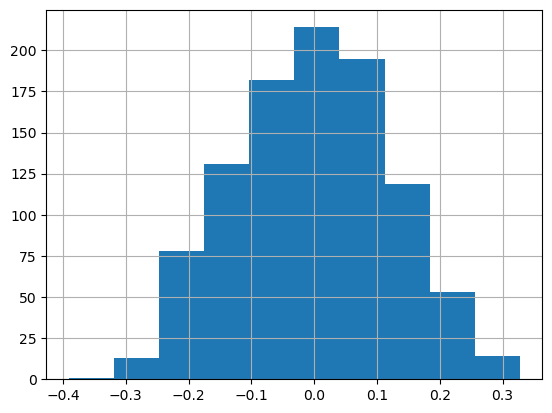

In [84]:
valores,dist = np.unique(res,return_counts=True) 
dist = dist/np.sum(dist) # Normaliza a distribuição (calcula a densidade)
plt.grid(True)
_ = plt.hist(res)

## Questão 4 

$R\in{0,1}$, onde $p_R(0)=p_R(1)=0.5$.

### Item 4-a

Nesse caso, a função custo é igual ao log

## Questão 5
- Fazer um gerador de números aleatórios que saia à distribuição do


## Questão 6
- 

## Questão 7

A função de Simulated Annealing pode ser vista abaixo:

In [1]:
def ConstantTemperatureSystem(x, FuncaoCusto, N, epsilon, T):
    n=0
    j = FuncaoCusto(x)

    while n < N:
        n += 1        
        xhat = x + epsilon*np.random.uniform(-.5,.5,size=x.shape)
        jhat = FuncaoCusto(xhat)
        if jhat - j < 0:
            x = xhat
            j = jhat
            continue
        if np.exp(-jhat/T) > np.random.uniform(0,1):
            x = xhat
            j = jhat
            continue
    return x

In [64]:
x = np.random.randint(0,10,size=(6,2))

def Custo(x):
    # Média de distância ao centro
    b = np.mean(x[:,0]**2+x[:,1]**2)
    # Distância entre partículas
    a = np.triu((x[:,0][:,np.newaxis]-x[:,0][np.newaxis,:])**2+(x[:,1][:,np.newaxis]-x[:,1][np.newaxis,:])**2)
    a = np.sum(1/np.where(a == 0, np.inf, a))
    # Custo total
    return b + 0.1*a

res = ConstantTemperatureSystem(x,Custo,10**6,0.2,10)
    

In [65]:
x

array([[0, 6],
       [2, 6],
       [1, 6],
       [5, 7],
       [2, 0],
       [0, 4]])

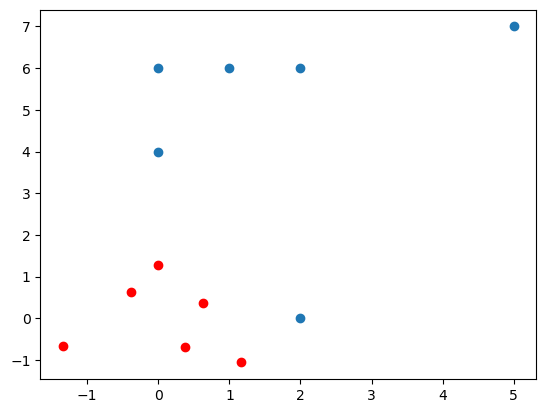

In [66]:
plt.scatter(x[:,0],x[:,1])
plt.scatter(res[:,0],res[:,1],color='red')